<a href="https://colab.research.google.com/github/okayode/fhn/blob/master/FHN2D_sciann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sciann

     |████████████████████████████████| 174kB 4.3MB/s 
     |████████████████████████████████| 563kB 7.8MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn
from sciann.utils.math import diff, sign

---------------------- SCIANN 0.6.3.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 


In [3]:
x = sn.Variable('x')
y = sn.Variable('y')
t = sn.Variable('t')


In [4]:
u = sn.Functional('u', [t,x,y], 5*[64], 'tanh')
v = sn.Functional('v', [t,x,y], 5*[64], 'tanh')

In [5]:
Ku = 10**(-4); a = 0.1;

In [6]:
epsilon=0.01; beta=0.5; gamma=1.0; delta=0;

In [7]:
L1=diff(u,t)-Ku*(diff(u, x, order=2)+diff(u, y, order=2))-u*(1-u)*(u-a)-v
L2=diff(v,t)-epsilon*(beta*u-gamma*v-delta)

In [8]:
TOL = 0.001


In [9]:
m = sn.SciModel(
    inputs=[x, y, t],
    targets=[L1, L2],
    loss_func="mse"
)

In [10]:
x_data, y_data, t_data = np.meshgrid(
    np.linspace(0, 2.5, 256), 
    np.linspace(0, 2.5, 256),
    np.linspace(0, 2000, 10)
)

In [11]:
h = m.train(
    [x_data, y_data, t_data],
    2*['zero'],
    learning_rate=0.002,
    epochs=100,
    verbose=0
    )


Total samples: 655360 
Batch size: 64 
Total batches: 10240 


Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 00070: early stopping at loss value 3.073510e-09
Revise 'stop_loss_value=0.000000010000' in '.train' if it was not your intent. 


In [12]:
x_test, y_test, t_test = np.meshgrid(
    np.linspace(0, 2.5, 256), 
    np.linspace(0, 2.5, 256),
    np.linspace(0, 2000, 10)
)

Text(0, 0.5, 'loss')

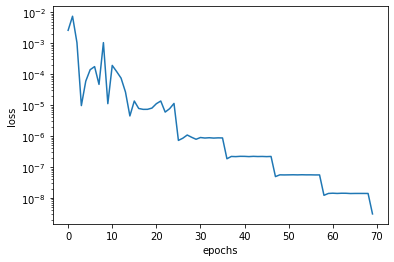

In [13]:
plt.semilogy(h.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [14]:
u_pred = u.eval(m, [x_test, y_test, t_test])

In [24]:
kay=x_test[:,:,9]
kay.shape

(256, 256)

In [25]:
xx_test = x_test[:,:,9].reshape(256,256)
xx_test.shape

(256, 256)

In [26]:
yy_test = y_test[:,:,9].reshape(256,256)
yy_test.shape

(256, 256)

In [27]:
uu_pred = u_pred[:,:,9].reshape(256,256)
uu_pred.shape

(256, 256)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: No contour levels were found within the data range.
  


Text(0.5, 1.0, 'FHN patterns')

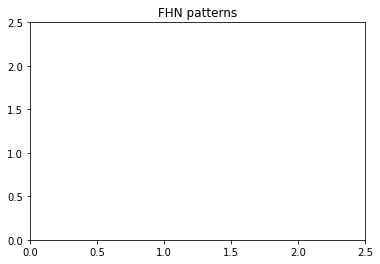

In [28]:
fig, ax = plt.subplots()
CS = ax.contour(xx_test, yy_test, uu_pred)
#ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('FHN patterns')

In [22]:
uu_pred

array([[0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765],
       [0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765],
       [0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765],
       ...,
       [0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765],
       [0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765],
       [0.00048765, 0.00048765, 0.00048765, ..., 0.00048765, 0.00048765,
        0.00048765]], dtype=float32)